<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="Victor Mono" SIZE=4>
<b> Universidad Sergio Arboleda</b>
<br>
<b> <FONT FACE="Victor Mono" SIZE=2> Escuela de Ciencias Exactas e Ingeniería</b>
<br>
<b>Machine Learning</b> - <i>Camilo Rodriguez</i>
<br>
<b>Parcial Tercer Corte</b>
<br>
<b>Autor</b> - <i>Juan José Montenegro Pulido</i>
<br>
<b>Correo</b> - <i>juan.montenegro@correo.usa.edu.co</i>
</FONT>
</div>

#**1. Exploración inicial**

In [ ]:
# Importación las bibliotecas necesarias:
import numpy as np
from google.colab import output
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat

In [ ]:
#Se exporta el archivo mat y se lee con libreria loadmat
mnist = loadmat("/content/mnist-original.mat")

In [ ]:
!wget = 

In [ ]:
# Se requiere el diccionario que posee los datos, imagenes.
mnist

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

In [ ]:
#Se observa el tamaño del diccionario
len(mnist)

6

In [ ]:
#Observamos la variable que posee el diccionario
list(mnist)

['__header__',
 '__version__',
 '__globals__',
 'mldata_descr_ordering',
 'data',
 'label']

#**2. Selección y extración de características**

In [ ]:
#Se dividen los datos, una parte para realizar el entrenamiento y el 30% restante para realizar el test final
X_train,X_test,y_train,y_test = train_test_split(mnist['data'].T, mnist['label'][0], test_size=0.3)

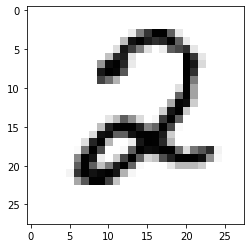

In [ ]:
#Observamos una de las imagenes que posee MNIST aleatoriamente
image =X_train[2000].reshape(28,28)
plt.imshow(image,cmap="binary")
plt.show()

In [ ]:
#Se observan los datos que posee la X_train
X_train[0, :]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
#Se observan los datos que posee la y_train
y_train[:20]

array([9., 4., 4., 5., 1., 2., 1., 6., 5., 2., 0., 9., 8., 9., 3., 8., 3.,
       8., 3., 1.])

In [ ]:
pipe_train = Pipeline([('scaler', MinMaxScaler())])
entrenados_X_train = pipe_train.fit_transform(X_train)

# **3. Evaluación y selección de modelos**

    Regresión Logistica

In [ ]:
#Se crea el clasificador de Regresión Logistica y se define las partes del KCROSS FOLD VALIDATION para evaluar.
clfL = LogisticRegression()
cvsL = cross_val_score(clfL,X_train[:2500],y_train[:2500],cv=10)
output.clear()
#Entrenamos el sistema con el clasificador definido (clfL).
logistica_fit = clfL.fit(X_train[:2500],y_train[:2500])
output.clear()
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvsL))
print('La desviación estandar de este clasificador es:',np.std(cvsL))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvsL)

La media para este clasificador es:  0.8548
La desviación estandar de este clasificador es: 0.017440183485273326
Resultado de las 10 iteraciones realizadas: 
 [0.864 0.872 0.836 0.84  0.836 0.888 0.86  0.856 0.864 0.832]


In [ ]:
#Con ayuda de la variable predict se llega a unos datos futuros, los cuales nos dan un resultado aproximado del resultado y conocido
y_predict_L = clfL.predict(X_train)

#La variable ACCURACY nos da a conocer la exactitud entre la variable conocida (y_train) y la variable que se predijo anteriormente (y_predict_L)
A_L = accuracy_score(y_train,y_predict_L)
print('Accuracy: ',A_L)

Accuracy:  0.8719183673469387


    Vectores de soporte

In [ ]:
#Se crea el clasificador de Vectores de soporte y se define las partes del KCROSS FOLD VALIDATION para evaluar.
svc = SVC()
cvs_svc = cross_val_score(svc,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_svc))
print('La desviación estandar de este clasificador es:',np.std(cvs_svc))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_svc)
#Entrenamos el sistema con el clasificador definido.
svc_fit = svc.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.9364000000000001
La desviación estandar de este clasificador es: 0.013078226179417413
Resultado de las 10 iteraciones realizadas: 
 [0.948 0.944 0.92  0.928 0.92  0.952 0.96  0.928 0.932 0.932]


In [ ]:
#Con ayuda de la variable predict se llega a unos datos futuros, los cuales nos dan un resultado aproximado del resultado y conocido
y_predict_SVC = svc.predict(X_train[:2500])

#La variable ACCURACY nos da a conocer la exactitud entre la variable conocida (y_train) y la variable que se predijo anteriormente (y_predict_SVC)
A_SVC = accuracy_score(y_train[:2500],y_predict_SVC)
print('Accuaracy: ',A_SVC)

Accuaracy:  0.9812


    Random Forest

In [ ]:
#Se crea el clasificador de Random Forest y se define las partes del KCROSS FOLD VALIDATION para evaluar.
forest = RandomForestClassifier()
cvs_forest = cross_val_score(forest,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_forest))
print('La desviación estandar de este clasificador es:',np.std(cvs_forest))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_forest)
#Entrenamos el sistema con el clasificador definido.
forest_fit = forest.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.9212
La desviación estandar de este clasificador es: 0.011461239025515496
Resultado de las 10 iteraciones realizadas: 
 [0.94  0.924 0.908 0.924 0.912 0.912 0.928 0.94  0.916 0.908]


In [ ]:
#Con ayuda de la variable predict se llega a unos datos futuros, los cuales nos dan un resultado aproximado del resultado y conocido
y_predict_forest = forest.predict(X_train[:2500])

#La variable ACCURACY nos da a conocer la exactitud entre la variable conocida (y_train) y la variable que se predijo anteriormente (y_predict_forest)
A_forest = accuracy_score(y_train[:2500],y_predict_forest)
print('Accuaracy: ',A_forest)

Accuaracy:  1.0


    Redes neuronales

In [ ]:
#Se crea el clasificador de Redes neuronales y se define las partes del KCROSS FOLD VALIDATION para evaluar.
clf = MLPClassifier()
cvs_redes = cross_val_score(clf,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_redes))
print('La desviación estandar de este clasificador es:',np.std(cvs_redes))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_redes)
#Entrenamos el sistema con el clasificador definido.
redes_fit = clf.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.8475999999999999
La desviación estandar de este clasificador es: 0.015435025105259804
Resultado de las 10 iteraciones realizadas: 
 [0.868 0.852 0.828 0.86  0.844 0.856 0.868 0.82  0.844 0.836]


In [ ]:
#Con ayuda de la variable predict se llega a unos datos futuros, los cuales nos dan un resultado aproximado del resultado y conocido
y_predict_redes = clf.predict(X_train[:2500])

#La variable ACCURACY nos da a conocer la exactitud entre la variable conocida (y_train) y la variable que se predijo anteriormente (y_predict_redes)
A_redes = accuracy_score(y_train[:2500],y_predict_redes)
print('Accuaracy: ',A_redes)

Accuaracy:  1.0


    Redes neuronales con keras

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28), name='input')) 

model.add(keras.layers.Dense(300, activation='relu', name='hidden1')) 
model.add(keras.layers.Dense(100, activation='relu', name='hidden2')) 

model.add(keras.layers.Dense(10, activation='softmax', name='output')) 

model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(entrenados_X_train, y_train, validation_split=0.3, epochs=20) # Entrenando el modelo e imprimiendo métricas

Epoch 1/20
1072/1072 [==============================] - 4s 4ms/step - loss: 0.2530 - accuracy: 0.9241 - val_loss: 0.1309 - val_accuracy: 0.9618
Epoch 2/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 0.1072 - val_accuracy: 0.9690
Epoch 3/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.0673 - accuracy: 0.9778 - val_loss: 0.1083 - val_accuracy: 0.9673
Epoch 4/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9845 - val_loss: 0.1030 - val_accuracy: 0.9688
Epoch 5/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0959 - val_accuracy: 0.9743
Epoch 6/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 0.0859 - val_accuracy: 0.9773
Epoch 7/20
1072/1072 [==============================] - 4s 3ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.1410 - val_accuracy:

#**4. Ajuste de hiperparametros**

    Regresión Logistica

In [ ]:
#Se define la variable que se quiere analizar, con  los valores que se desean
param_gridL = [{ 'penalty':['l1', 'l2', 'elasticnet'], 'C' : [0.001, 0.1,10]}]
output.clear()

#Evaluación de los parametros efectuados anteriormente
gsL = GridSearchCV(clfL,param_gridL,cv=10)

#Entrenamiento de las variables con los hiperparametros deseados
gsL.fit(X_train[:2500],y_train[:2500])
output.clear()

#Nos da a conocer el mejor hiperparametro
print(gsL.best_params_)


{'C': 0.001, 'penalty': 'l2'}


    Vectores de soporte

In [ ]:
#Se define la variable que se quiere analizar, con  los valores que se desean
param_grid_SVC = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
#Evaluación de los parametros efectuados anteriormente
gs_SVC = GridSearchCV(svc,param_grid_SVC,cv=10)

#Entrenamiento de las variables con los hiperparametros deseados
gs_SVC.fit(X_train[:2500],y_train[:2500])
output.clear()

#Nos da a conocer el mejor hiperparametro
gs_SVC.best_params_

{'kernel': 'rbf'}

    Random Forest 

In [ ]:
#Se define la variable que se quiere analizar, con  los valores que se desean
param_grid_forest = [{ 'criterion':['gini', 'entropy'],'n_estimators':[3,5,10], 'max_samples' :[2,5,10]}]
#Evaluación de los parametros efectuados anteriormente
gs_forest = GridSearchCV(forest,param_grid_forest,cv=10)

#Entrenamiento de las variables con los hiperparametros deseados
gs_forest.fit(X_train[:2500],y_train[:2500])
output.clear()

#Nos da a conocer el mejor hiperparametro
gs_forest.best_params_

{'criterion': 'entropy', 'max_samples': 10, 'n_estimators': 10}

    Redes Neuronales

In [ ]:
#Se define la variable que se quiere analizar, con  los valores que se desean
param_grid_redes = [{ 'activation':['relu', 'logistic'], 'hidden_layer_sizes':[2,3,5], 'max_iter':[10,100,10000]}]
#Evaluación de los parametros efectuados anteriormente
gs_redes = GridSearchCV(clf,param_grid_redes,cv=5)

#Entrenamiento de las variables con los hiperparametros deseados
gs_redes.fit(X_train[:2500],y_train[:2500])
output.clear()

#Nos da a conocer el mejor hiperparametro
gs_redes.best_params_


{'activation': 'logistic', 'hidden_layer_sizes': 5, 'max_iter': 10000}

#**5. Evaluación final**



    Regresión Logistica

In [ ]:
#Se crea el clasificador de Regresión Logistica y se define las partes del KCROSS FOLD VALIDATION para evaluar.
clfL_E = LogisticRegression(C=0.001, penalty= 'l2')
cvsL_E = cross_val_score(clfL_E,X_train[:2500],y_train[:2500],cv=10)
output.clear()
#Entrenamos el sistema con el clasificador definido (clfL).
logistica_fit = clfL_E.fit(X_train[:2500],y_train[:2500])
output.clear()
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvsL_E))
print('La desviación estandar de este clasificador es:',np.std(cvsL_E))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',np.array(cvsL_E))

La media para este clasificador es:  0.8652
La desviación estandar de este clasificador es: 0.020321417273408877
Resultado de las 10 iteraciones realizadas: 
 [0.876 0.896 0.856 0.872 0.828 0.88  0.88  0.868 0.864 0.832]


    Vectores de soporte

In [ ]:
#Se crea el clasificador de Vectores de soporte y se define las partes del KCROSS FOLD VALIDATION para evaluar.
svc_e = SVC(kernel ='rbf')
cvs_svc_e = cross_val_score(svc_e,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_svc_e))
print('La desviación estandar de este clasificador es:',np.std(cvs_svc_e))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_svc_e)
#Entrenamos el sistema con el clasificador definido.
svc_fit = svc_e.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.9364000000000001
La desviación estandar de este clasificador es: 0.013078226179417413
Resultado de las 10 iteraciones realizadas: 
 [0.948 0.944 0.92  0.928 0.92  0.952 0.96  0.928 0.932 0.932]


    Random Forest

In [ ]:
#Se crea el clasificador de Random Forest y se define las partes del KCROSS FOLD VALIDATION para evaluar.
forest_e = RandomForestClassifier(criterion='entropy', max_samples=10, n_estimators=10)
cvs_forest_e = cross_val_score(forest_e,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_forest_e))
print('La desviación estandar de este clasificador es:',np.std(cvs_forest_e))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_forest_e)
#Entrenamos el sistema con el clasificador definido.
forest_fit = forest.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.30399999999999994
La desviación estandar de este clasificador es: 0.017158088471621778
Resultado de las 10 iteraciones realizadas: 
 [0.296 0.32  0.34  0.312 0.304 0.288 0.292 0.276 0.312 0.3  ]


    Redes Neuronales

In [ ]:
#Se crea el clasificador de Redes neuronales y se define las partes del KCROSS FOLD VALIDATION para evaluar.
clf_redes = MLPClassifier(activation= 'logistic', hidden_layer_sizes = 5, max_iter=10000)
cvs_redes_e = cross_val_score(clf_redes,X_train[:2500],y_train[:2500],cv=10)
#Se imprimen datos estadisticos como la media y el estandar.
print('La media para este clasificador es: ',np.mean(cvs_redes_e))
print('La desviación estandar de este clasificador es:',np.std(cvs_redes_e))
#Se imprime el cvs y se observan las iteraciones realizadas.
print('Resultado de las 10 iteraciones realizadas: \n',cvs_redes_e)
#Entrenamos el sistema con el clasificador definido.
redes_fit = clf_redes.fit(X_train[:2500],y_train[:2500])

La media para este clasificador es:  0.704
La desviación estandar de este clasificador es: 0.06311893535223802
Resultado de las 10 iteraciones realizadas: 
 [0.684 0.784 0.568 0.628 0.672 0.732 0.756 0.756 0.72  0.74 ]


# **6. Analisis final**

In [ ]:
pipe_test = Pipeline([('scaler', MinMaxScaler())])
entrenados_X_test = pipe_test.fit_transform(X_test)

In [ ]:
model.fit(entrenados_X_test, y_test, validation_split=0.3, epochs=20) # Entrenando el modelo e imprimiendo métricas

Epoch 1/20
460/460 [==============================] - 2s 4ms/step - loss: 0.1273 - accuracy: 0.9697 - val_loss: 0.1098 - val_accuracy: 0.9727
Epoch 2/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.1131 - val_accuracy: 0.9740
Epoch 3/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.1149 - val_accuracy: 0.9748
Epoch 4/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.1168 - val_accuracy: 0.9775
Epoch 5/20
460/460 [==============================] - 2s 3ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.1251 - val_accuracy: 0.9762
Epoch 6/20
460/460 [==============================] - 2s 3ms/step - loss: 8.6602e-04 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9778
Epoch 7/20
460/460 [==============================] - 2s 4ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1340 - val_accuracy: 0.9767
Ep